In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Upload CSV files
from google.colab import files
uploaded = files.upload()

Saving a1.csv to a1.csv
Saving a2.csv to a2.csv
Saving a3.csv to a3.csv
Saving a4.csv to a4.csv
Saving a5.csv to a5.csv
Saving a6.csv to a6.csv
Saving a7.csv to a7.csv
Saving a8.csv to a8.csv
Saving a9.csv to a9.csv
Saving a10.csv to a10.csv
Saving a11.csv to a11.csv
Saving a12.csv to a12.csv
Saving a13.csv to a13.csv
Saving a14.csv to a14.csv
Saving a15.csv to a15.csv
Saving a16.csv to a16.csv
Saving a17.csv to a17.csv
Saving a18.csv to a18.csv
Saving a19.csv to a19.csv
Saving a20.csv to a20.csv
Saving a21.csv to a21.csv
Saving a22.csv to a22.csv
Saving a23.csv to a23.csv
Saving a24.csv to a24.csv
Saving a25.csv to a25.csv
Saving a26.csv to a26.csv
Saving a27.csv to a27.csv
Saving a28.csv to a28.csv
Saving a29.csv to a29.csv
Saving a30.csv to a30.csv
Saving a31.csv to a31.csv
Saving a32.csv to a32.csv
Saving a33.csv to a33.csv
Saving a34.csv to a34.csv
Saving a35.csv to a35.csv
Saving a36.csv to a36.csv
Saving a37.csv to a37.csv
Saving a38.csv to a38.csv
Saving a39.csv to a39.csv
Savi

In [4]:
all_data = []
all_labels = []

for filename in uploaded.keys():
    df = pd.read_csv(filename)
    df = df.iloc[1:]  # Skip the first row (header row)

    # Ensure the column names match your dataset
    if 'X_coordinate' in df.columns and 'Y_coordinate' in df.columns:
        # Handle missing 'frame' column
        if 'frame' not in df.columns:
            df['frame'] = df.index // 21  # Assuming 21 landmarks per frame

        df['frame'] = df['frame'].astype(int)  # Ensure 'frame' column is integer
        grouped = df.groupby('frame')  # Group by frame
        for frame, group in grouped:
            if len(group) == 21:  # Ensure there are 21 landmarks per frame
                x_y = group[['X_coordinate', 'Y_coordinate']].values.flatten()
                all_data.append(x_y)
                label = filename.split('_')[0]  # Extract label from filename
                all_labels.append(label)
    else:
        raise KeyError("Expected columns 'X_coordinate' and 'Y_coordinate' not found in the dataset.")



In [5]:
# Step 3: Pad sequences to ensure equal lengths
max_len = max(len(data) for data in all_data)
all_data = [np.pad(data, (0, max_len - len(data)), mode='constant') for data in all_data]

# Convert data to NumPy array
all_data = np.array(all_data, dtype=float)

In [6]:
# Step 4: Encode labels
label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)
num_classes = len(label_encoder.classes_)

# Convert labels to categorical
all_labels_encoded = tf.keras.utils.to_categorical(all_labels_encoded, num_classes=num_classes)

In [7]:
# Step 5: Adjust timesteps and reshape data
n_samples = all_data.shape[0]
n_features = 42  # Fixed number of features (21 landmarks * 2 coordinates)
n_timesteps = all_data.shape[1] // n_features

if n_timesteps * n_features != all_data.shape[1]:
    # Truncate excess data to fit (timesteps * features)
    all_data = all_data[:, :n_timesteps * n_features]

all_data = all_data.reshape(n_samples, n_timesteps, n_features)

In [8]:
# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_data, all_labels_encoded, test_size=0.2, random_state=42)

In [13]:
# Step 7: Build CNN model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu',
           input_shape=(n_timesteps, n_features),
           padding='same'), # Add padding to avoid dimension reduction
    # Reduce pool_size to 1 or remove MaxPooling1D if n_timesteps is small
    MaxPooling1D(pool_size=1),  # Changed pool_size to 1
    Flatten(),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 1, 64)               │           8,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 38)                  │           1,254 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,462 (44.77 KB)

 Trainable params: 11,462 (44.77 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Step 8: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=4, validation_data=(X_test, y_test))

Epoch 1/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1284 - loss: 39.5119 - val_accuracy: 0.2330 - val_loss: 7.1932
Epoch 2/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3259 - loss: 3.8813 - val_accuracy: 0.3301 - val_loss: 2.6003
Epoch 3/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4205 - loss: 2.3204 - val_accuracy: 0.3301 - val_loss: 3.0122
Epoch 4/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4278 - loss: 2.3263 - val_accuracy: 0.3301 - val_loss: 2.4256
Epoch 5/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4112 - loss: 2.0467 - val_accuracy: 0.3301 - val_loss: 2.2686
Epoch 6/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4340 - loss: 1.9436 - val_accuracy: 0.3301 - val_loss: 2.6212
Epoch 7/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4813 - loss: 1.7688 - val_accuracy: 0.4272 - val_loss: 2.1081
Epoch 8/20
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4742 - loss: 1.6448 - val_accuracy: 0

In [15]:
# Step 9: Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test to labels

accuracy = accuracy_score(y_test_labels, y_pred)
precision = precision_score(y_test_labels, y_pred, average='weighted', zero_division=1)

print("Test Accuracy:", round(accuracy, 4))  # Rounded to 4 decimal places
print("Test Precision:", round(precision, 4))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Test Accuracy: 0.6505
Test Precision: 0.7337


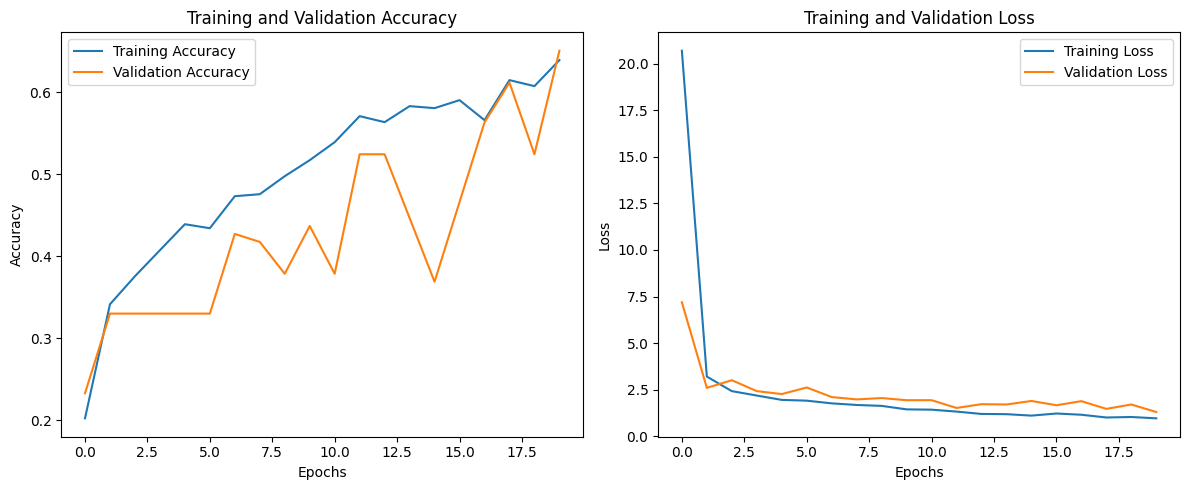

In [16]:
# Step 10: Plot training and validation metrics
# Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

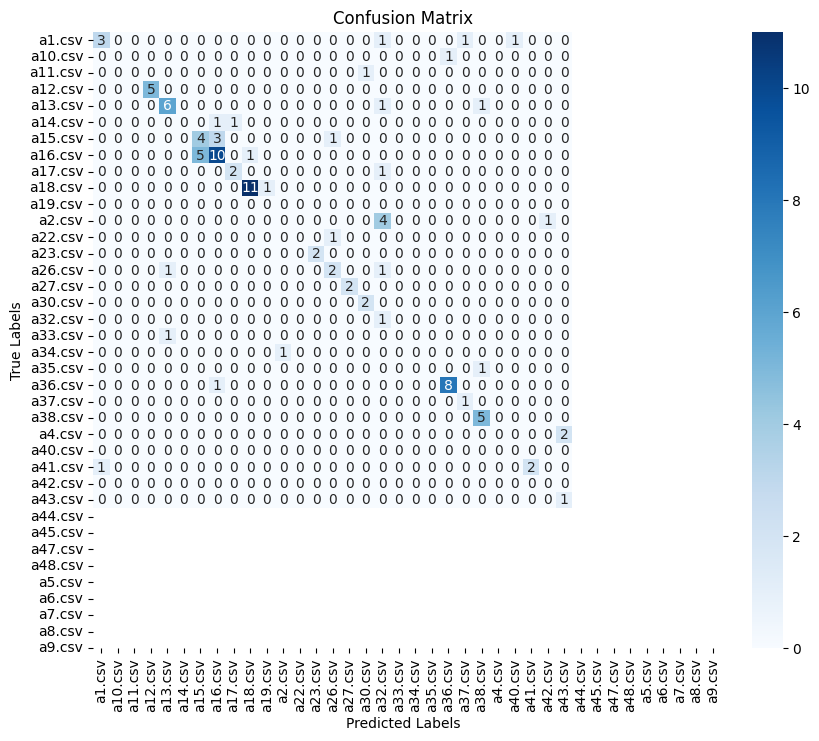

In [17]:
# Step 11: Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()